In [1]:
import numpy as np
import os
import json
import pycpd
from matplotlib import pyplot as plt

In [2]:
def extract_annotation(data):
    for item in data:
        if 'classification' in item['properties']:
            if item['properties']['classification']['name'] == 'Region*':
                annotation_list = []
                for sublist in item['geometry']['coordinates']:
                    for sublist2 in sublist:
                        for point in sublist2:
                            annotation_list.append(point)
                return np.array(annotation_list)

In [3]:
file_path_anno = ['data/Annotation-C.json', 
                  'data/Annotation-D.json',
                  'data/Annotation-E.json',
                  'data/Annotation-F.json',
                  'data/Annotation-G.json',
                  'data/Annotation-H.json']

x_annotations = []
y_annotations = []

for path in file_path_anno:
    annotation = []
    with open(path) as f:
        data = json.load(f)
    annotation = extract_annotation(data)
    x_annotation = annotation[:,0]
    x_annotations.append(x_annotation)
    y_annotation = annotation[:,1]
    y_annotations.append(y_annotation)

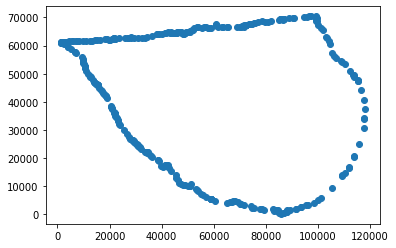

In [4]:
# Annotation C
plt.scatter(x_annotations[0],y_annotations[0])

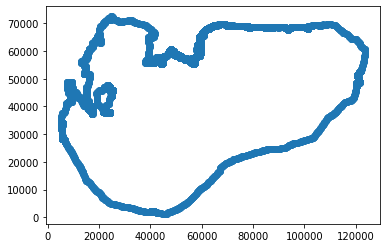

In [5]:
# Annotation D
plt.scatter(x_annotations[1],y_annotations[1])

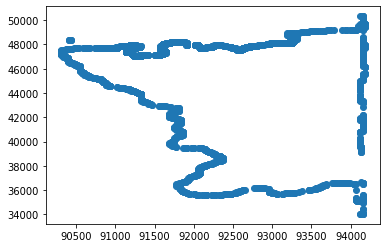

In [6]:
# Annotation E
plt.scatter(x_annotations[2],y_annotations[2])

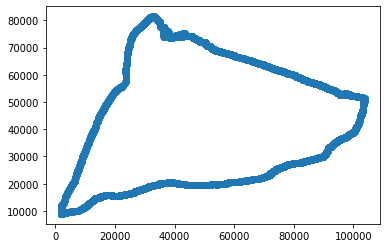

In [7]:
# Annotation F
plt.scatter(x_annotations[3],y_annotations[3])

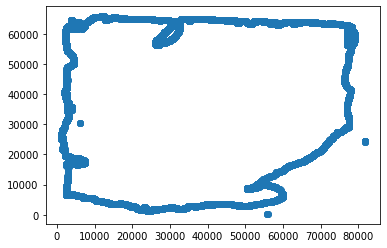

In [8]:
# Annotation G
plt.scatter(x_annotations[4],y_annotations[4])

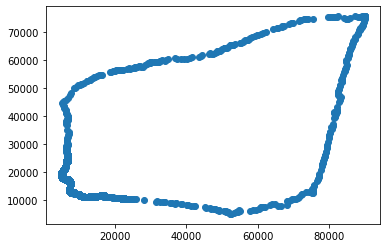

In [9]:
# Annotation H
plt.scatter(x_annotations[5],y_annotations[5])

In [10]:
file_path_cut = ['data/Schnitt-C.obj', 
                 'data/Schnitt-D.obj',
                 'data/Schnitt-E.obj',
                 'data/Schnitt-F.obj',
                 'data/Schnitt-G.obj',
                 'data/Schnitt-H.obj']
x_cuts = []
y_cuts = []

for path in file_path_cut:
    with open(path) as f:
        readlines = f.readlines()
    l = []
    for line in readlines:
        if line.startswith('l '):
            lines = line.split(' ')
            if lines[1] not in l:
                l.append(int(lines[1]))
            if lines[2] not in l:
                l.append(int(lines[2]))
                
    x_cut = []
    y_cut = []
    for index in l:
        splitted = readlines[index-1].split(' ')
        x_cut.append(float(splitted[3]))
        y_cut.append(float(splitted[1]))
    x_cuts.append(x_cut)
    y_cuts.append(y_cut)

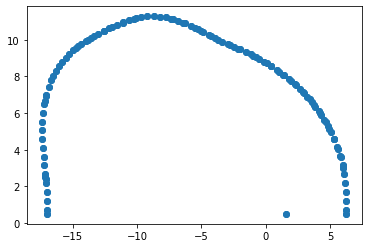

In [11]:
# Schnitt C
plt.scatter(x_cuts[0], y_cuts[0])

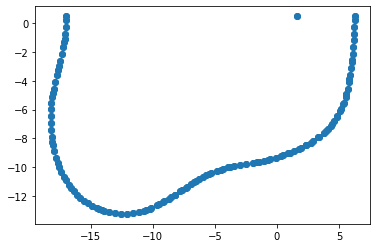

In [12]:
# Schnitt D
plt.scatter(x_cuts[1], y_cuts[1])

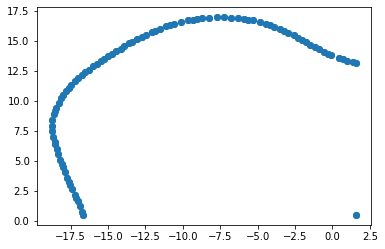

In [13]:
# Schnitt E
plt.scatter(x_cuts[2], y_cuts[2])

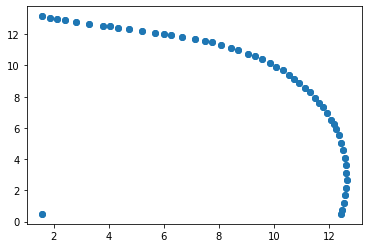

In [14]:
# Schnitt F
plt.scatter(x_cuts[3], y_cuts[3])

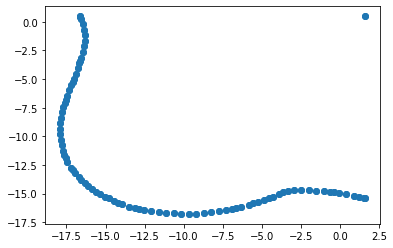

In [15]:
# Schnitt G
plt.scatter(x_cuts[4], y_cuts[4])

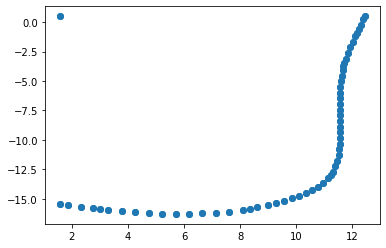

In [16]:
# Schnitt H
plt.scatter(x_cuts[5], y_cuts[5])

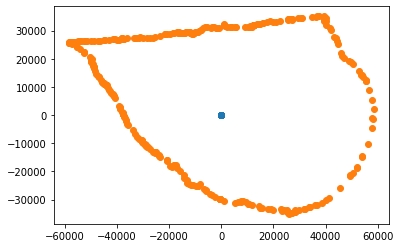

In [17]:
# Vorregestrierung

# https://medium.com/@olga_kravchenko/generalized-procrustes-analysis-with-python-numpy-c571e8e8a421
# *gemeinsamen Nullpunkt finden
x_edited_anns=[]
y_edited_anns=[]
x_edited_cuts=[]
y_edited_cuts=[]

def center_list(list):
    #extrema bestimmen
    min_list=min(list)
    max_list=max(list)
    
    #vesrschiebung errechnen
    center=(min_list+max_list)/2
    
    #Punkte verschieben
    return_list=np.array(list)-center
    
    return return_list

for i in range(0, len(x_cuts)):
    x_edited_anns.append(center_list(x_annotations[i]))
    y_edited_anns.append(center_list(y_annotations[i]))
    x_edited_cuts.append(center_list(x_cuts[i]))
    y_edited_cuts.append(center_list(y_cuts[i]))
    
plt.scatter(x_edited_cuts[0],y_edited_cuts[0])
plt.scatter(x_edited_anns[0],y_edited_anns[0])

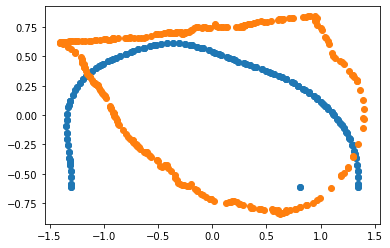

In [20]:
# *Abstände zum Nullpunkt normalisieren
def scale_lists(x_list,y_list):
    dists=np.sqrt(x_list**2 + y_list**2)
    avrg_dist=np.average(dists)
    scaled_x_list=x_list/avrg_dist
    scaled_y_list=y_list/avrg_dist
    return scaled_x_list, scaled_y_list

for i in range(0,len(x_edited_anns)):
    x_edited_anns[i],y_edited_anns[i]= scale_lists(x_edited_anns[i],y_edited_anns[i])
    
for i in range(0,len(x_edited_cuts)):
    x_edited_cuts[i],y_edited_cuts[i]= scale_lists(x_edited_cuts[i],y_edited_cuts[i])

plt.scatter(x_edited_cuts[0],y_edited_cuts[0])
plt.scatter(x_edited_anns[0],y_edited_anns[0])

<Figure size 432x288 with 0 Axes>

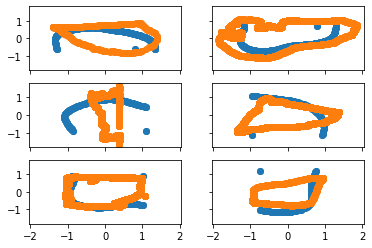

In [24]:
f = plt.figure()    
f, axes = plt.subplots(nrows = 3, ncols = 2, sharex=True, sharey = True)
for i in range(0,len(x_edited_cuts)):
    axes[int(i/2),i%2].scatter(x_edited_cuts[i],y_edited_cuts[i])
    axes[int(i/2),i%2].scatter(x_edited_anns[i],y_edited_anns[i])
    
#Ergebisse sind Falsch Rotiert und sehen hier verzerrt aus, aber die Ergenisse sollten okay sein 

In [ ]:
# *Upsampling - # Interpolation für mehr Punkte

In [ ]:
# Point Drift Registrierung

In [ ]:
# Für Datei D, Rotation und Ausrichtung richtig. Für andere Dateien problematisch, Lösung suchen

In [ ]:
# Programm bereinigen, Abgabefertig machen